#Import the right libraries

In [204]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
import hopsworks
import pandas as pd

In [206]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/190613
Connected. Call `.close()` to terminate connection gracefully.


In [207]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv')
wine_df 


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Transform column names into valid names   

In [208]:
wine_df.columns = wine_df.columns.str.replace(' ', '_')
wine_df.columns = wine_df.columns.str.lower()
wine_df


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [209]:
y_wine = wine_df['quality']
X_wine = wine_df.drop(['quality'], axis=1)

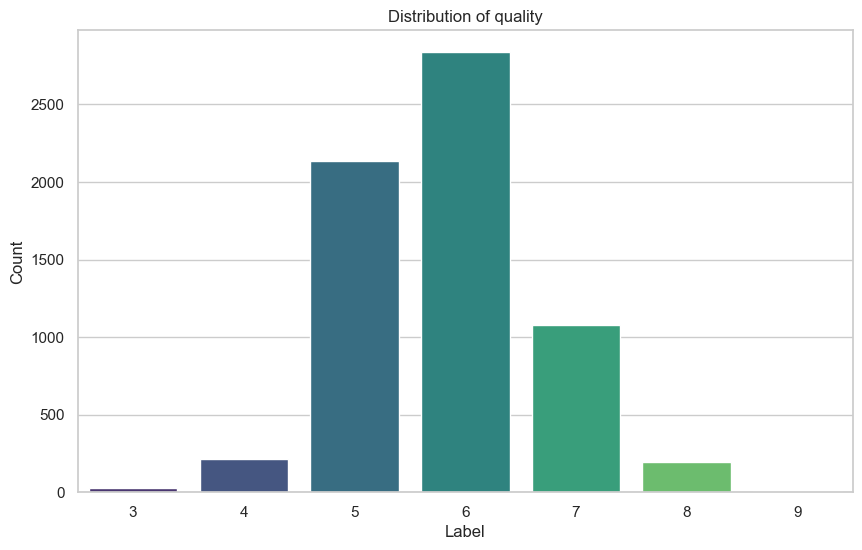

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'label_column' is the column you want to visualize
label_column = 'quality'
sns.set(style="whitegrid")  # Set the style for seaborn

# Count the occurrences of each unique value in the label column
label_counts = wine_df['quality'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of ' + label_column)




# Show the plot
plt.show()

wine_df['quality'].value_counts()

# Clean up all na and process all catergorial data

In [211]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#I only want to encode the first column
X_wine['type'] = label_encoder.fit_transform(X_wine['type'])
X_wine.head(-5)

wine_df_cleaned = pd.concat([X_wine, y_wine], axis=1)
wine_df_cleaned.head(-5)
wine_df = wine_df_cleaned
wine_df.fillna(0, inplace=True)

wine_df

print(wine_df.isna().sum())



type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [212]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# Create a StandardScaler object
#normalize the data

y_wine = wine_df['quality']
x_wine = wine_df.drop(['quality'], axis=1)

# scaler = MinMaxScaler()
scaler = StandardScaler()
# scaler = scaler.fit(x_wine)
# Standardize the data
x_wine_standard = scaler.fit_transform(x_wine)


x_wine_standard = pd.DataFrame(x_wine_standard, columns=x_wine.columns)

x_wine_standard.head(6400)

Wine_standard = x_wine_standard 
#I want to add y_wine to the last column of X_wine_standard
Wine_standard['quality'] = y_wine
Wine_standard

#compute the ratio of the free_sulfur_dioxide to total_sulfur_dioxide and call the column ratio_sulfur_dioxide
Wine_standard['ratio_sulfur_dioxide'] = Wine_standard['free_sulfur_dioxide']/Wine_standard['total_sulfur_dioxide']

#compute the skew of the features and call the column skewness
Wine_standard['skewness'] = Wine_standard.skew(axis = 1, skipna = True)

#compute the kurtosis of the features and call the column kurtosis
Wine_standard['kurtosis'] = Wine_standard.kurtosis(axis = 1, skipna = True)

#compute the mean of the features and call the column mean
Wine_standard['mean'] = Wine_standard.mean(axis = 1, skipna = True)

#compute the median of the features and call the column median
Wine_standard['median'] = Wine_standard.median(axis = 1, skipna = True)

#compute the variance of the features and call the column variance
Wine_standard['variance'] = Wine_standard.var(axis = 1, skipna = True)

#compute the standard deviation of the features and call the column std
Wine_standard['std'] = Wine_standard.std(axis = 1, skipna = True)

#compute the coefficient of variation of the features and call the column cv
Wine_standard['cv'] = Wine_standard.std(axis = 1, skipna = True)/Wine_standard.mean(axis = 1, skipna = True)

#compute the range of the features and call the column range
Wine_standard['range'] = Wine_standard.max(axis = 1, skipna = True) - Wine_standard.min(axis = 1, skipna = True)

#compute the interquartile range of the features and call the column iqr
Wine_standard['iqr'] = Wine_standard.quantile(q=0.75, axis=1) - Wine_standard.quantile(q=0.25, axis=1)
#compute the covariance of the features and call the column covariance

scaler = StandardScaler()

Wine = scaler.fit_transform(Wine_standard)

Wine = pd.DataFrame(Wine, columns=Wine_standard.columns)

Wine.head(6400)


#this is the dataframe we are going to upload!!!
Wine_upload = Wine



#drop the quality column
Wine_upload.drop(['quality'], axis=1, inplace=True)

#add the quality column
Wine_upload['quality'] = y_wine


Wine_upload.head()


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,...,skewness,kurtosis,mean,median,variance,std,cv,range,iqr,quality
0,0.571367,-0.154935,-0.419922,0.284942,3.206683,-0.314605,0.815565,0.959976,2.102214,-1.067966,...,-0.321501,-0.738674,0.179868,1.285606,-0.070099,-0.072346,-0.662660,-0.068325,-0.377606,6
1,0.571367,-0.682768,-0.238066,0.147373,-0.807621,-0.200456,-0.931107,0.287618,-0.232332,0.429622,...,0.109370,0.499828,-0.349464,-1.623112,-0.058391,-0.055510,0.944045,-0.057300,0.294167,6
2,0.571367,0.674516,-0.359304,0.560080,0.306296,-0.171918,-0.029599,-0.331660,0.134525,0.229944,...,1.267827,0.756033,0.238067,-0.390942,-0.062564,-0.062214,-0.467070,-0.070236,-0.377011,6
3,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,...,0.819352,0.673149,0.303087,0.586501,-0.064226,-0.064547,-0.617582,-0.069718,-0.522914,6
4,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,...,0.819352,0.673149,0.303087,0.586501,-0.064226,-0.064547,-0.617582,-0.069718,-0.522914,6


In [213]:
from sklearn.model_selection import train_test_split
x = Wine.drop(['quality'], axis=1)
y = y_wine
print(y)
Wine.head(5)

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,...,skewness,kurtosis,mean,median,variance,std,cv,range,iqr,quality
0,0.571367,-0.154935,-0.419922,0.284942,3.206683,-0.314605,0.815565,0.959976,2.102214,-1.067966,...,-0.321501,-0.738674,0.179868,1.285606,-0.070099,-0.072346,-0.662660,-0.068325,-0.377606,6
1,0.571367,-0.682768,-0.238066,0.147373,-0.807621,-0.200456,-0.931107,0.287618,-0.232332,0.429622,...,0.109370,0.499828,-0.349464,-1.623112,-0.058391,-0.055510,0.944045,-0.057300,0.294167,6
2,0.571367,0.674516,-0.359304,0.560080,0.306296,-0.171918,-0.029599,-0.331660,0.134525,0.229944,...,1.267827,0.756033,0.238067,-0.390942,-0.062564,-0.062214,-0.467070,-0.070236,-0.377011,6
3,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,...,0.819352,0.673149,0.303087,0.586501,-0.064226,-0.064547,-0.617582,-0.069718,-0.522914,6
4,0.571367,-0.004126,-0.662397,0.009804,0.642572,0.056381,0.928254,1.243074,0.301278,-0.119494,...,0.819352,0.673149,0.303087,0.586501,-0.064226,-0.064547,-0.617582,-0.069718,-0.522914,6


(6497, 20)
(6497, 22)


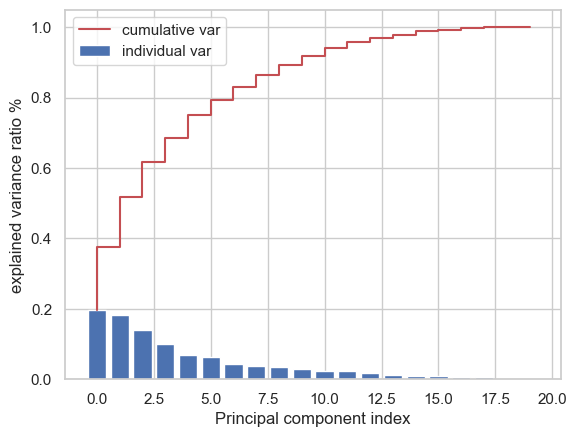

In [214]:
from sklearn.decomposition import PCA
import numpy as np
n = 20
pca = PCA(n_components=n) # doing pca and keeping only n_components
pca = pca.fit(x) # the correct dimension of X for sklearn is P*N (samples*features)
X_pca_skl = pca.transform(x)
#X2 = pca.inverse_transform(X_pca_skl)
import matplotlib.pyplot as plt
plt.bar(range(0,n), pca.explained_variance_ratio_, label="individual var");
plt.step(range(0,n), np.cumsum(pca.explained_variance_ratio_),'r', label="cumulative var");
plt.xlabel('Principal component index'); plt.ylabel('explained variance ratio %');
plt.legend()
print(X_pca_skl.shape)
print(x.shape)
#print(X1)
#print(X1-X2)

In [215]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)



In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




def model_evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train.values.ravel())
    predictions = model.predict(x_test)
    print("Accuracy score: %.2f" % accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    score = model.score(x_test, y_test)

    cm = metrics.confusion_matrix(y_test, predictions)
    print(cm)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5,
                square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size=10)
    return score

Accuracy score: 0.96
[[  0   5   1   0   0   0   0]
 [  0  31   6   1   0   1   0]
 [  0   0 413  13   2   1   0]
 [  0   0   0 548   7   0   0]
 [  0   0   1  11 213   2   0]
 [  0   0   0   3   0  39   0]
 [  0   0   0   0   0   2   0]]
[[  0   5   1   0   0   0   0]
 [  0  31   6   1   0   1   0]
 [  0   0 413  13   2   1   0]
 [  0   0   0 548   7   0   0]
 [  0   0   1  11 213   2   0]
 [  0   0   0   3   0  39   0]
 [  0   0   0   0   0   2   0]]


0.9569230769230769

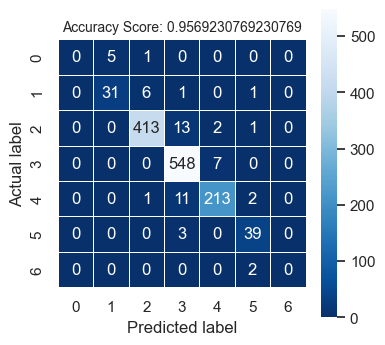

In [217]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model_evaluation(model, x_train, x_test, y_train, y_test)

Accuracy score: 0.88
[[  0   4   2   0   0   0   0]
 [  0  19  17   1   2   0   0]
 [  0   1 402  22   4   0   0]
 [  0   0  18 532   5   0   0]
 [  0   0   1  40 185   1   0]
 [  0   0   0   5  37   0   0]
 [  0   0   0   0   0   2   0]]
[[  0   4   2   0   0   0   0]
 [  0  19  17   1   2   0   0]
 [  0   1 402  22   4   0   0]
 [  0   0  18 532   5   0   0]
 [  0   0   1  40 185   1   0]
 [  0   0   0   5  37   0   0]
 [  0   0   0   0   0   2   0]]


0.8753846153846154

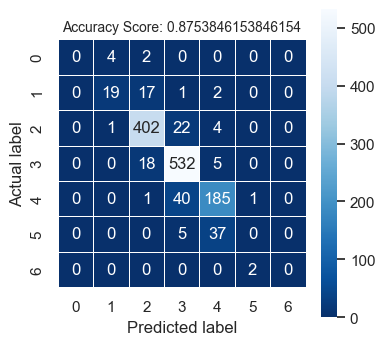

In [218]:
#LogisticRegression with max iterations
from sklearn.linear_model import SGDClassifier
model = LogisticRegression(max_iter=10000)
model = SGDClassifier()
model = svm.SVC()
model_evaluation(model, x_train, x_test, y_train, y_test)

In [219]:
Wine_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   float64
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  ratio_sulfur_dioxide  6497 non-null   float64
 14  skewness              6497 non-null   float64
 15  kurtosis             

In [223]:
wine_fg = fs.get_or_create_feature_group(name='winequality'
                                           ,version='7'
                                           ,primary_key=['type','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','ph','sulphates','alcohol','ratio_sulfur_dioxide','skewness','kurtosis','mean','median','variance','std','cv','range','iqr','quality']
                                            ,description='wine quality')
wine_fg.insert(Wine_upload)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/190613/fs/190532/fg/231775


Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: winequality_7_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/190613/jobs/named/winequality_7_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1f80d7c88e0>, None)

In [224]:
wine_fg = fs.get_feature_group(name="winequality", version=6)
query = wine_fg.select_all()
print(query.show(10))
# feature_view = fs.get_or_create_feature_view(name="winequality",
#                                              version=5,
#                                              description="Read from winequality feature group",
#                                              labels=["quality"],
#                                              query=query)


: 

In [ ]:
## Make the query into a pandas dataframe








In [ ]:
print(Wine_standard.head(10))


   type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0   1.0       0.440252          0.170886     0.216867        0.314590   
1   1.0       0.396226          0.189873     0.204819        0.024316   
2   1.0       0.509434          0.177215     0.240964        0.104863   
3   1.0       0.452830          0.145570     0.192771        0.129179   
4   1.0       0.452830          0.145570     0.192771        0.129179   
5   1.0       0.509434          0.177215     0.240964        0.104863   
6   1.0       0.389937          0.202532     0.096386        0.106383   
7   1.0       0.440252          0.170886     0.216867        0.314590   
8   1.0       0.396226          0.189873     0.204819        0.024316   
9   1.0       0.509434          0.139241     0.259036        0.022796   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0   0.073650             0.152778              0.377880  0.267785  0.748130   
1   0.080196             0.045139     

In [ ]:
Wine_standard.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,1.0,0.440252,0.170886,0.216867,0.314590,0.073650,0.152778,0.377880,0.267785,0.748130,0.225,0.115942,6
1,1.0,0.396226,0.189873,0.204819,0.024316,0.080196,0.045139,0.290323,0.132832,0.822943,0.245,0.217391,6
2,1.0,0.509434,0.177215,0.240964,0.104863,0.081833,0.100694,0.209677,0.154039,0.812968,0.220,0.304348,6
3,1.0,0.452830,0.145570,0.192771,0.129179,0.094926,0.159722,0.414747,0.163678,0.795511,0.200,0.275362,6
4,1.0,0.452830,0.145570,0.192771,0.129179,0.094926,0.159722,0.414747,0.163678,0.795511,0.200,0.275362,6


In [ ]:
query.show(5)





Finished: Reading data from Hopsworks, using ArrowFlight (1.02s) 


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.571367,-1.059791,0.246883,-0.402904,-0.912708,0.056381,-0.593041,0.429167,-0.662555,0.279863,-0.675563,-0.663917,6
1,0.571367,0.976135,-0.359304,0.147373,1.756489,-0.428755,0.083090,0.800733,1.135045,-0.419011,-0.876448,-0.496219,6
2,-1.750190,2.408823,-0.480541,1.110357,-0.744570,0.284680,-1.381861,-1.871006,0.848229,0.579381,2.270748,0.342271,6
3,-1.750190,2.635037,3.399055,0.147373,0.243244,1.597401,-0.424009,-0.296272,2.732541,0.030265,0.998477,-0.999313,5
4,0.571367,-0.230340,-0.116829,-0.127765,-0.765587,-0.571442,-0.142287,0.022213,-0.669225,0.130104,-0.340755,0.426120,6
